# Subject - Machine Learning - Supervised Learning-1
# File - FedEx Model Building
# Name - Debjit Ray
# ID - 12010066
# Batch - AMPBA 2021S 

## Import Libraries and Read Files

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Considering 2 principal components covering more than 90%
#predictors_train = pd.read_csv("data/preprocessed_trainSet_DF.csv")
#actual_train = pd.read_csv("data/actual_train.csv")

# Considering 8 principal components covering only 50%
predictors_train = pd.read_csv("data/preprocessed_trainSet.csv")
actual_train = pd.read_csv("data/actual_trainSet.csv")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
def fnc_TrainModel(model, mdl_name, predictors_train, actual_train):
    print("---------------------------------------------------------------")
    print("*                     {}                  *".format(mdl_name))
    print("---------------------------------------------------------------")

    # Train the model
    model.fit(predictors_train, actual_train) #Training the model

    model_prediction = model.predict(predictors_train)
    accuracy = accuracy_score(np.array(actual_train).reshape(-1, 1), model_prediction)
    precision = precision_score(actual_train, model_prediction)
    recall = recall_score(actual_train, model_prediction) 

    print ("Accuracy of {} is : {}".format(mdl_name, np.round(accuracy,5)))
    print ("Precision of {} is : {}".format(mdl_name, np.round(precision,5)))
    print ("Recall of {} is : {}".format(mdl_name, np.round(recall,5)))
    print("\n")

In [5]:
# Define all the models - This first set is going to work on only the selected features
lda_mdl = LinearDiscriminantAnalysis()
dt_mdl = DecisionTreeClassifier(random_state = 5)
rf_mdl = RandomForestClassifier(random_state = 5)
lr_mdl = LogisticRegression(random_state = 5)
nb_mdl= GaussianNB()
knn_mdl = KNeighborsClassifier()

model_list = [(lda_mdl, "LDA"), 
              (dt_mdl, "Decision Tree"), 
              (rf_mdl, "Random Forest"), 
              (lr_mdl, "Logistic Regression"), 
              (nb_mdl, "Naive Bayes"), 
              (knn_mdl, "K Nearest Neighbours")]

for (eachModel, mdl_name) in model_list:
    fnc_TrainModel(eachModel, mdl_name, predictors_train, actual_train.values.ravel())

---------------------------------------------------------------
*                     LDA                  *
---------------------------------------------------------------
Accuracy of LDA is : 0.89241
Precision of LDA is : 1.0
Recall of LDA is : 0.47085


---------------------------------------------------------------
*                     Decision Tree                  *
---------------------------------------------------------------
Accuracy of Decision Tree is : 1.0
Precision of Decision Tree is : 1.0
Recall of Decision Tree is : 1.0


---------------------------------------------------------------
*                     Random Forest                  *
---------------------------------------------------------------
Accuracy of Random Forest is : 1.0
Precision of Random Forest is : 1.0
Recall of Random Forest is : 1.0


---------------------------------------------------------------
*                     Logistic Regression                  *
----------------------------------------

In [6]:
def fncCalcPerformance(model, X, Y):
    model_prediction = model.predict(X)    
    accuracy = np.round(accuracy_score(Y, model_prediction),5)
    # Calculate precision, recall, true positive rate, false positive rate and AUC for different models        
    precision = np.round(precision_score(Y, model_prediction),5)
    recall = np.round(recall_score(Y, model_prediction),5)        
    model_prediction_prob = model.predict_proba(X)[::,1]
    fpr, tpr, _ = roc_curve(Y, model_prediction_prob)
    auc = roc_auc_score(Y, model_prediction_prob)
    cm = metrics.confusion_matrix(Y, model_prediction)
    f1 = np.round(f1_score(Y, model_prediction),5)
    return(accuracy, precision, recall, fpr, tpr, auc, cm, f1)

In [7]:
# Read the transformed validation dataset
predictors_val = pd.read_csv("data/preprocessed_valSet.csv")
actual_val = pd.read_csv("data/actual_valSet.csv")

In [8]:
predictors_val.shape

(739655, 8)

In [9]:
actual_val.shape

(739655, 1)

In [10]:
score_list = []
model_scores = pd.DataFrame(columns = ['setName','ModelName', 'Accuracy','Precision','Recall','confmatrix_TN','confmatrix_FP','confmatrix_FN','confmatrix_TP','fpr','tpr','auc', 'f1'])

for (model, mdl_name) in (model_list):
    print(mdl_name)
    dict1 = {}
    accuracy, precision, recall, fpr, tpr, auc, cm, f1  = fncCalcPerformance(model, predictors_val, actual_val.values.ravel())
    dict1.update({'setName': 'Validation',
                  'ModelName': mdl_name,
                  'Accuracy': accuracy,
                  'Precision': precision,
                  'Recall': recall,
                  'confmatrix_TN': cm[0,0],
                  'confmatrix_FP': cm[0,1],
                  'confmatrix_FN': cm[1,0],
                  'confmatrix_TP': cm[1,1],
                  'fpr': [fpr],
                  'tpr': [tpr],
                  'auc': auc,
                  'f1': f1
                 })

    score_list.append(dict1)
model_scores = model_scores.append(score_list, ignore_index= True)

LDA
Decision Tree
Random Forest
Logistic Regression
Naive Bayes
K Nearest Neighbours


#### For the current problem statement, predicting a delay in Delivery when there is no delay is less costly, than predicting no Delay when there is a delay. In other words, False Negative is more costly than False Positives. 
#### With the same argument, the Recall has more significance than Precision.

In [11]:
model_scores.drop(columns=['fpr', 'tpr'], inplace=False).sort_values(by=['confmatrix_FN','Recall'], ascending= [True, False])

,setName,ModelName,Accuracy,Precision,Recall,confmatrix_TN,confmatrix_FP,confmatrix_FN,confmatrix_TP,auc,f1
2,Validation,Random Forest,0.99637,0.99198,0.99025,587203,1211,1474,149767,0.999928,0.99112
3,Validation,Logistic Regression,0.99525,0.98911,0.98766,586770,1644,1866,149375,0.999890,0.98839
1,Validation,Decision Tree,0.99472,0.98747,0.98669,586520,1894,2013,149228,0.991736,0.98708
5,Validation,K Nearest Neighbours,0.99170,0.98633,0.97291,586374,2040,4097,147144,0.998712,0.97957
4,Validation,Naive Bayes,0.95984,0.95476,0.84356,582369,6045,23660,127581,0.974030,0.89572
0,Validation,LDA,0.89186,1.00000,0.47113,588414,0,79987,71254,0.996743,0.64050


#### Based on the above validation set results, other than LDA; all other models have very high accuracy precision and recall. However, the best models are Random Forest and Logistic Regression.  Hence, we will take these forward and tune them to see which one performs better on the final test dataset.

# 7. Hyper parameter Tuning

#### Next for the finalized models, we will perform some hyper parameter tuning to see if we can further improve the performance of the models on our original test dataset.

In [12]:
print('Hyper parameters currently in use for Random Forest:\n')
print(rf_mdl.get_params())

Hyper parameters currently in use for Random Forest:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Hyper parameters for Random Forest
depth = [20, 40]
min_sampl_leaf = [1, 20]
min_sampl_split = [2, 20, 40]
class_wt = [None, {"0": 0.796, "1":0.204}] #Original distribution of data

# define grid search
grid_params = dict(max_depth = depth, class_weight = class_wt, min_samples_split = min_sampl_split, min_samples_leaf = min_sampl_leaf)

rf_grid_search = GridSearchCV(estimator=rf_mdl, param_grid=grid_params, n_jobs=-1, scoring='recall')
rf_grid_result = rf_grid_search.fit(predictors_val, actual_val.values.ravel())
print("Random Forest Best Recall: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))

C:\Users\HP\anaconda3\envs\mlsl\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.98775464 0.98650498 0.98564542 0.98434948 0.98434948 0.98434948
 0.98772819 0.98687525 0.98598263 0.9843627  0.9843627  0.9843627
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  category=UserWarning


Random Forest Best Recall: 0.987755 using {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


# 8. Build and Train Final Model

In [16]:
# Define all the models - This first set is going to work on only the selected features
rf_final = RandomForestClassifier(random_state = 5, class_weight= None, min_samples_leaf = 1, min_samples_split = 2, max_depth = 20)
fnc_TrainModel(rf_final, 'Random Forest', predictors_train, actual_train.values.ravel())

---------------------------------------------------------------
*                     Random Forest                  *
---------------------------------------------------------------
Accuracy of Random Forest is : 0.99991
Precision of Random Forest is : 0.99987
Recall of Random Forest is : 0.99969




# 9.Test the Final Models

In [17]:
# Read the transformed test dataset
predictors_test = pd.read_csv("data/preprocessed_testSet.csv")
actual_test = pd.read_csv("data/actual_testSet.csv")

In [22]:
final_score = pd.DataFrame(columns = ['setName','ModelName', 'Accuracy','Precision','Recall','confmatrix_TN','confmatrix_FP','confmatrix_FN','confmatrix_TP','fpr','tpr','auc','f1'])
print('Random Forest')
dict1 = {}
accuracy, precision, recall, fpr, tpr, auc, cm, f1  = fncCalcPerformance(model, predictors_test, actual_test.values.ravel())
dict1.update({'setName': 'Validation',
              'ModelName': 'Random Forest',
              'Accuracy': accuracy,
              'Precision': precision,
              'Recall': recall,
              'confmatrix_TN': cm[0,0],
              'confmatrix_FP': cm[0,1],
              'confmatrix_FN': cm[1,0],
              'confmatrix_TP': cm[1,1],
              'fpr': [fpr],
              'tpr': [tpr],
              'auc': auc,
              'f1': f1})

final_score = final_score.append(dict1, ignore_index= True)

Random Forest


### View final performance metrics

In [28]:
final_score.drop(columns=['fpr', 'tpr'], inplace=False).sort_values(by=['confmatrix_FN','Recall'], ascending= [True, False])

,setName,ModelName,Accuracy,Precision,Recall,confmatrix_TN,confmatrix_FP,confmatrix_FN,confmatrix_TP,auc,f1
0,Validation,Random Forest,0.99174,0.98606,0.97336,837747,2971,5752,210181,0.998816,0.97967


## Plot ROC curve

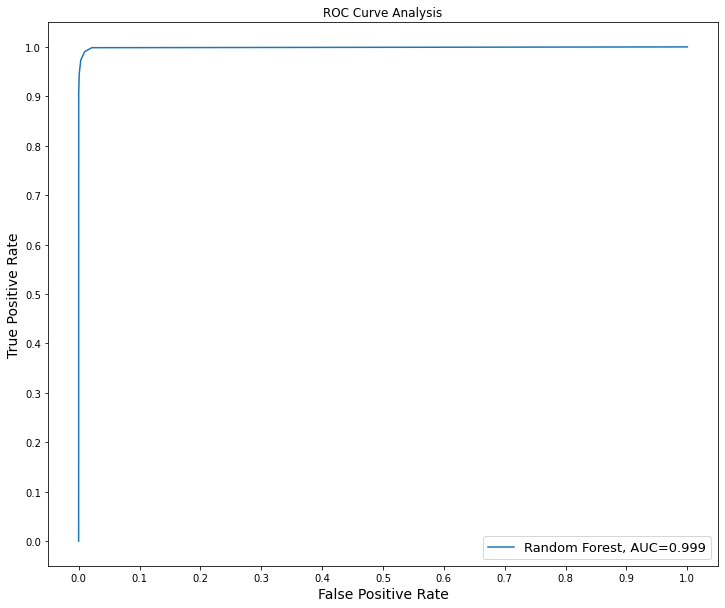

In [29]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,10))

fpr = final_score.iloc[0]['fpr'][0]
tpr = final_score.iloc[0]['tpr'][0]
plt.plot(fpr, tpr, label ="{}, AUC={:.3f}".format(final_score.iloc[0]['ModelName'], final_score.iloc[0]['auc']))
#plt.plot([0,1],[0,1], color = 'orange', linestyle = '--')
plt.xticks(np.arange(0.0, 1.1, step = 0.1))
plt.xlabel("False Positive Rate", fontsize = 14)
plt.yticks(np.arange(0.0, 1.1, step = 0.1))
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title('ROC Curve Analysis')
plt.legend(prop={'size': 13}, loc= 'lower right')
plt.show()

<AxesSubplot:title={'center':'Random Forest'}>

<Figure size 432x288 with 0 Axes>

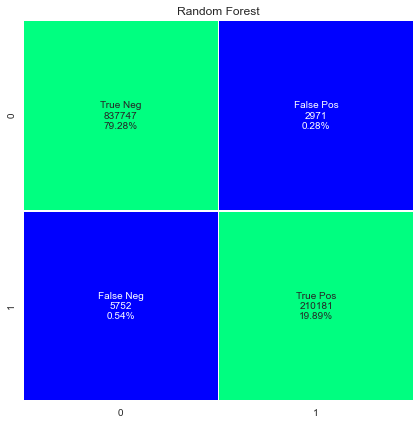

In [33]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure()
fig = plt.figure(figsize = (7,7))

array = [final_score.iloc[0]['confmatrix_TN'], final_score.iloc[0]['confmatrix_FP'], 
         final_score.iloc[0]['confmatrix_FN'], final_score.iloc[0]['confmatrix_TP']]
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in array]
group_percentages = ['{0:.2%}'.format(value) for value in array/np.sum(array)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
df_cm = pd.DataFrame(np.asarray(array).reshape(2,2))
plt.title(final_score.iloc[0]['ModelName'])
sns.heatmap(df_cm/np.sum(df_cm), fmt = '', annot=labels, cmap= 'winter', cbar= False, linewidths=1, linecolor='white')
